<a href="https://colab.research.google.com/github/ykitaguchi77/ImageProcessing/blob/master/Eye_crop_bilateral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#顔の画像から目を検出して切り抜くスクリプト
・Haarcascade_eyeを使用<br>
・目が検出できないものはskipする<br>
・横幅を2倍、縦幅を上に1倍追加/下に0.5倍追加して画像を切り取る（目の全幅、眉毛が含まれるように）

・切り取った画像を250px*250pxにresizeする<br>
・対応表をCSV形式で出力（連番、左右、元フォルダ、元画像名）

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import copy
import pandas as pd
import csv
from random import randint
from time import sleep
import numpy as np
import sys

import glob
import random
from PIL import Image
%matplotlib inline

#サポートパッチのインポート
from google.colab.patches import cv2_imshow
import cv2

plt.ion()   # interactive mode

#Google colabをマウント

In [1]:
'''
・dlibを用いて目を切り抜く
・横幅を2倍、縦幅を上に1倍追加/下に0.5倍追加して画像を切り取る（目の全幅、眉毛が含まれるように）
'''

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#残り時間確認
!cat /proc/uptime | awk '{printf("残り時間 : %.2f", 12-$1/60/60)}'


残り時間 : 11.87

In [8]:
#元画像
in_path = '/content/drive/MyDrive/Deep_learning/Face_Images/IMG_3110.JPG'

#保存先フォルダ
out_path = '/content/drive/My Drive/Deep_learning/eyelid_images/IMG_3110_eye.JPG'


#Haarcascadeを指定

In [9]:
# カスケードファイルのパス
eye_cascade_path = '/content/drive/My Drive/Deep_learning/haarcascade_eye.xml'

# カスケード分類器の特徴量取得
eye_cascade = cv2.CascadeClassifier(eye_cascade_path)

In [10]:
img = cv2.imread(in_path) 
img2 = img.copy()

# 画像グレースケール化
grayscale_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#300pix以上のもので目に見えるものを抽出
eye_list = eye_cascade.detectMultiScale(grayscale_img, minSize=(300, 300))
print('image path = ',in_path)

# 眼検出判定
if len(eye_list) >= 1:
    print('目が' + str(len(eye_list)) +'個検出されました')
    pass
else:
    print("no eye detected")
    sys.exit()


#画像の切り抜きと保存（連番にする）

for (ex, ey, ew, eh) in eye_list:
    print("[ex,ey] = %d,%d [ew,eh] = %d,%d" %(ex, ey, ew, eh))


    
    try:
      cv2.rectangle(img2, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
      
      top = 

      #切り抜き範囲が元画像をはみ出る場合は黒画像で埋める
      top = max(0, ey-eh)
      bottom = min(grayscale_img.shape[0], int(ey + eh*3/2))
      left = max(0,int(ex-ew/2))
      right = min(grayscale_img.shape[1], int(ex + ew*3/2))

      img_cropped = img[top: bottom,left:right]
      height, width = img_cropped.shape[:2]

      img_background = np.zeros((int(2.5*ew),int(2.5*eh),3), dtype = np.uint8)
      img_background[0: height, 0: width] = img_cropped 
      img_resized = cv2.resize(img_background,(1000,1000)) #1辺250pixにresize 
      #x, y = random.randint(0,27), random.randint(0,27) #ランダムな位置で224pixに切り取る
      #img_randcrop = img_resized[y: y+223, x: x+223]
    except:
      print('crop error')

    if ex <= grayscale_img.shape[1]/2:
        side = 0 #600ピクセル目より左にあるのは右眼
    else:
        side = 1 #600ピクセル目より右にあるのは左眼



image path =  /content/drive/MyDrive/Deep_learning/Face_Images/IMG_3110.JPG
目が2個検出されました
[ex,ey] = 1247,1189 [ew,eh] = 436,436
[ex,ey] = 596,1278 [ew,eh] = 424,424


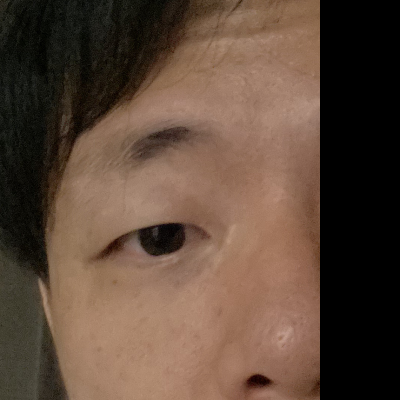

In [11]:
#img = cv2.imread(out_path)
img = img_resized

#アスペクト比を維持したまま横を400pixelに縮小する
def scale_to_width(img, width):
    scale = width / img.shape[1]
    return cv2.resize(img, dsize=None, fx=scale, fy=scale)
dst = scale_to_width(img, 400)

#図を表示する
cv2_imshow(dst)

#画像を切り抜いて連番で出力、対応表出力
12時間で60000枚を処理するのは不可能（1秒間に3枚として12000枚 =フォルダ1600個ぐらいが限界）<br>
→1回のセッションでフォルダ1000個ずつを処理することとする

In [ ]:
#処理時間の計測
start = time.time()

with open(csv_path, 'a', newline='') as f:  #a:追記モード
        writer = csv.writer(f)
        fieldnames = ['Number', 'Folder', 'FileName']       
        writer.writerow(['Folder', 'Image_num', 'side (R:0, L:1)', 'ImageName', 'Number'])  #header
        
        m=0
        k=0
        for i in processing_directory:  #フォルダ数の分だけ
              file = os.listdir(in_path + '/' + i)
              m+=1
              k+=1
              l=0
              for j in file:
                    l+=1
                    #print(str(l))
                    print('')
                    img = cv2.imread(in_path + '/' + i + '/' + j) 
                    img2 = img.copy()

                    # 画像グレースケール化
                    grayscale_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

                    #300pix以上のもので目に見えるものを抽出
                    eye_list = eye_cascade.detectMultiScale(grayscale_img, minSize=(300, 300))
                    print('image path = '+ in_path + '/' + i + '/' + j )
                    
                    # 眼検出判定
                    if len(eye_list) >= 1:
                        print('目が' + str(len(eye_list)) +'個検出されました')
                        pass
                    else:
                        print("no eye detected")
                        break

                    #画像の切り抜きと保存（連番にする）
                    
                    for (ex, ey, ew, eh) in eye_list:
                        #print("[ex,ey] = %d,%d [ew,eh] = %d,%d" %(ex, ey, ew, eh))
                        
                        try:
                          cv2.rectangle(img2, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
                          
                          #切り抜き範囲が元画像をはみ出る場合は黒画像で埋める
                          top = max(0, ey-eh)
                          bottom = min(grayscale_img.shape[0], int(ey + eh*3/2))
                          left = max(0,int(ex-ew/2))
                          right = min(grayscale_img.shape[1], int(ex + ew*3/2))

                          img_cropped = img[top: bottom,left:right]
                          height, width = img_cropped.shape[:2]

                          img_background = np.zeros((int(2.5*ew),int(2.5*eh),3), dtype = np.uint8)
                          img_background[0: height, 0: width] = img_cropped 
                          img_resized = cv2.resize(img_background,(1000,1000)) #1辺250pixにresize 
                          #x, y = random.randint(0,27), random.randint(0,27) #ランダムな位置で224pixに切り取る
                          #img_randcrop = img_resized[y: y+223, x: x+223]
                        except:
                          print('crop error')

                        if ex <= grayscale_img.shape[1]/2:
                            side = 0 #600ピクセル目より左にあるのは右眼
                        else:
                            side = 1 #600ピクセル目より右にあるのは左眼
                        

                        print("processing "+str(l)+"th image in "+str(m)+ "th subject")

                        #保存する際のよくわからないエラーをskipする
                        try:
                            cv2.imwrite(out_path + '/'+str(i)+'-' + str(l) + '-' + str(side)+ '.jpg', img_resized)
                            #対応表の作成
                            writer.writerow([str(i), str(l),side, str(j), str(k+1)])
                            k+=1
                        except:
                            print('csv writing error')               

print('Process done!!')
elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")



image path = /content/drive/My Drive/Deep_learning/eyelid_images/in/3197/20160803124711_眼位_O_0_656be109bc33c3b2e7b7d1ad32112bda4002c0499e9830bd13a321b4f6f4f1e3.jpg
目が2個検出されました
processing 1th image in 1th subject
processing 1th image in 1th subject

image path = /content/drive/My Drive/Deep_learning/eyelid_images/in/3197/20160803124711_眼位_O_0_bcaaffeb4d047409812c71af4536f0906b40b81456ec113bc0e9cdf0d6636812.jpg
目が2個検出されました
processing 2th image in 1th subject
processing 2th image in 1th subject

image path = /content/drive/My Drive/Deep_learning/eyelid_images/in/3197/20160915150401_眼位_O_0_36f3bfb30cf2a04306b529b8745a1e1d9132df5bae48c9df00df18f3fda00cce.jpg
目が2個検出されました
processing 3th image in 1th subject
processing 3th image in 1th subject

image path = /content/drive/My Drive/Deep_learning/eyelid_images/in/3197/20160915150401_眼位_O_0_6ca7a1ff6fc440f4ef8171daaf1fa2b19dc49250f1a6771a5b9f4f1038e92d44.jpg
目が2個検出されました
processing 4th image in 1th subject
processing 4th image in 1th subject

ima

KeyboardInterrupt: ignored

#切り取られた図を表示してみる

['7205-1-1.jpg', '7213-7-0.jpg', '7213-5-0.jpg', '7213-7-1.jpg', '7213-6-0.jpg', '7213-5-1.jpg', '7213-4-1.jpg', '7213-4-0.jpg', '7213-2-1.jpg', '7213-3-1.jpg', '7213-3-0.jpg', '7213-1-0.jpg', '7213-1-1.jpg', '7213-2-0.jpg', '7211-1-0.jpg', '7213-8-1.jpg', '7213-8-0.jpg', '7211-1-1.jpg', '7205-1-0.jpg']


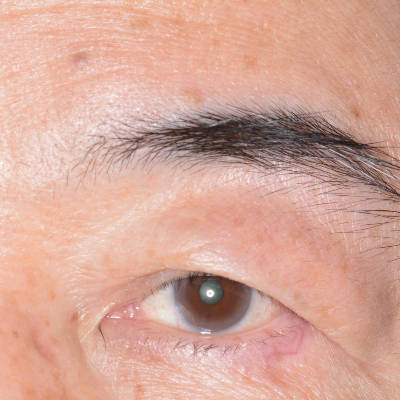

In [ ]:
img_list = os.listdir(out_path)
print(img_list)
img = cv2.imread(out_path + '/'+img_list[0])


#アスペクト比を維持したまま横を400pixelに縮小する
def scale_to_width(img, width):
    scale = width / img.shape[1]
    return cv2.resize(img, dsize=None, fx=scale, fy=scale)
dst = scale_to_width(img, 400)

#図を表示する
cv2_imshow(dst)